In [51]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from lens_simulation import Lens, Simulation
from scipy import fftpack
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [253]:
amplitude = 10000
pixel_size = 0.1e-6 
n_slices = 1000

lens_width = 600e-6

lens = Lens.Lens(
    diameter=lens_width,
    height=0,
    exponent=2.,
    medium=Lens.Medium(2.348)
)


In [326]:
# specify desired angle
theta_deg = 10
theta = np.deg2rad(theta_deg)

NA = 0.4
medium = Lens.Medium(1.)

def theta_from_NA(numerical_aperture, output_medium):
    import numpy as np
    return np.arcsin(numerical_aperture/output_medium)

def focal_distance_from_theta(lens, theta):
    return lens.diameter/2 / np.tan(theta)

def height_from_focal_distance(lens, output_medium, focus):
    a = 1
    b = -2*focus*(lens.medium.refractive_index-output_medium.refractive_index)/output_medium.refractive_index
    c = (lens.diameter/2)**2

    if (b**2 - 4*a*c < 0):
        raise ValueError("Negative value encountered in sqrt.  Can't find a lens height to give this focal distance")
    else: return (-b - np.sqrt(b**2 - 4*a*c))/(2*a)

theta_calc = theta_from_NA(NA, medium.refractive_index)
# theta_calc = theta
print(f'Angle of convergence: {np.rad2deg(theta_calc)}')

focal_distance = focal_distance_from_theta(lens, theta_calc)
print(f'Focal distance wanted: {round(focal_distance*1e3, 3)}mm')
lens.height = height_from_focal_distance(lens, output_medium=medium, focus=focal_distance)
lens.generate_profile(pixel_size=pixel_size)

print(f'Height 2: {round(lens.height*1e6, 3)}um')
print(f'New Focal Distance: {Simulation.calculate_equivalent_focal_distance(lens, medium)*1e3}mm')


Angle of convergence: 23.578178478201835
Focal distance wanted: 0.687mm
Height 2: 49.909um
New Focal Distance: 0.6873863542433761mm


In [346]:
A = 10000
sim_wavelength = 488e-9

frequency_array_1 = Simulation.generate_squared_frequency_array(
    n_pixels=len(lens.profile), pixel_size=pixel_size)
l_width = lens.diameter /2 + 50e-6
l_radius = l_width/2


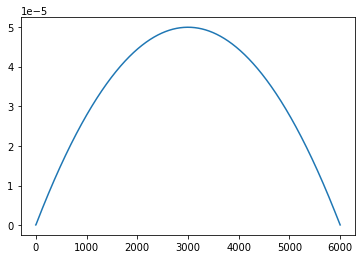

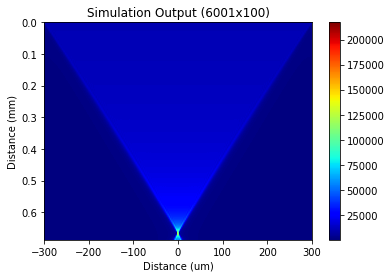

In [347]:
lens.height = height_from_focal_distance(lens, output_medium=medium, focus=focal_distance)
lens.generate_profile(pixel_size=pixel_size)
frequency_array_1 = Simulation.generate_squared_frequency_array(
    n_pixels=len(lens.profile), pixel_size=pixel_size)
start_distance_1 = focal_distance * 0.
# finish_distance_1 = focal_distance-(l_radius/np.tan(theta))
finish_distance_1 = focal_distance#-(l_radius/np.tan(theta))
# 
plt.plot(lens.profile)
delta_1 = (lens.medium.refractive_index-medium.refractive_index) * lens.profile
phase_1 = (2 * np.pi * delta_1 / sim_wavelength) % (2 * np.pi)

wavefront_1 = A * np.exp(1j * phase_1)
wavefront_1 = fftpack.fft(wavefront_1)

n_slices_1 = 100

sim_1 = np.ones(shape=((n_slices_1), len(lens.profile)))
distances_1 = np.linspace(start_distance_1, finish_distance_1, n_slices_1)
for i, z in enumerate(distances_1):
    prop_1 = np.exp(1j * medium.wave_number * z) * np.exp(
        (-1j * 2 * np.pi ** 2 * z * frequency_array_1) / medium.wave_number
    )
    # print("prop shape: ", prop.shape)
    propagation = fftpack.ifft(prop_1 * wavefront_1)

    output = np.sqrt(propagation.real ** 2 + propagation.imag ** 2)

    sim_1[i] = np.round(output, 10)

from lens_simulation import utils
utils.plot_simulation(sim_1, sim_1.shape[1], sim_1.shape[0], pixel_size, start_distance_1, finish_distance_1)
plt.show()
# passed_wavefront = propagation


# DIVERGING CASE

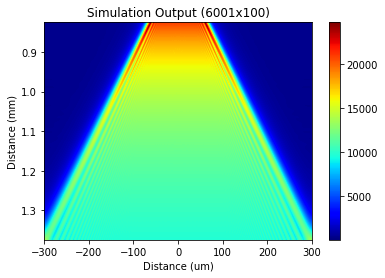

In [348]:

wavefront_1 = A * np.exp(1j * phase_1)
wavefront_1 = fftpack.fft(wavefront_1)

n_slices_1 = 100

start_distance_1 = focal_distance * 1.2
# start_distance_1 = 0
# finish_distance_1 = focal_distance + (l_radius/np.tan(theta))
finish_distance_1 = focal_distance * 2

sim_1 = np.ones(shape=((n_slices_1), len(lens.profile)))
distances_1 = np.linspace(start_distance_1, finish_distance_1, n_slices_1)
for i, z in enumerate(distances_1):
    prop_1 = np.exp(1j * medium.wave_number * z) * np.exp(
        (-1j * 2 * np.pi ** 2 * z * frequency_array_1) / medium.wave_number
    )
    # print("prop shape: ", prop.shape)
    propagation = fftpack.ifft(prop_1 * wavefront_1)

    output = np.sqrt(propagation.real ** 2 + propagation.imag ** 2)

    sim_1[i] = np.round(output, 10)

from lens_simulation import utils
utils.plot_simulation(sim_1, sim_1.shape[1], sim_1.shape[0], pixel_size, start_distance_1, finish_distance_1)
plt.show()
passed_wavefront = propagation


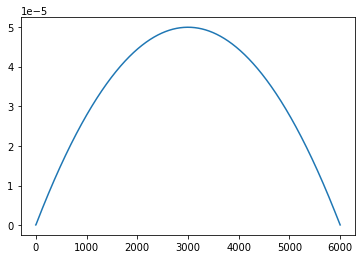

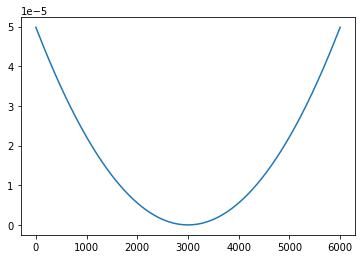

In [349]:
lens.generate_profile(pixel_size=pixel_size)
plt.plot(lens.profile)

lens.profile = -lens.profile + np.max(lens.profile) 
plt.figure()
plt.plot(lens.profile)



0.00035


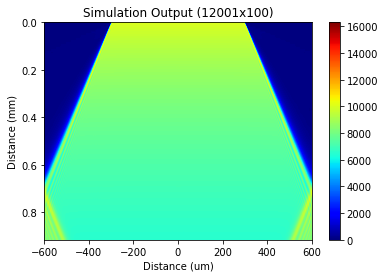

In [350]:
start_distance_1 = focal_distance * 0.
l_r = lens.diameter/2
print(l_width)
# finish_distance_1 = focal_distance
finish_distance_1 = focal_distance*((l_width*2-l_r)/(l_r))
# finish_distance_1 = focal_distance-(l_radius/np.tan(theta))
# finish_distance_1 = focal_distance#-(l_radius/np.tan(theta))
lens.generate_profile(pixel_size=pixel_size)
lens.profile = abs(lens.profile - np.max(lens.profile)) 
pad_px = len(lens.profile)//2
lens.profile = np.pad(lens.profile, pad_px)
frequency_array_1 = Simulation.generate_squared_frequency_array(
    n_pixels=len(lens.profile), pixel_size=pixel_size)

lens.medium = Lens.Medium(2.348)
delta_1 = (lens.medium.refractive_index-medium.refractive_index) * lens.profile
phase_1 = (2 * np.pi * delta_1 / sim_wavelength) % (2 * np.pi)

wavefront_1 = A * np.exp(1j * phase_1) #* passed_wavefront
wavefront_1 [0:pad_px] = 0 + 0j
wavefront_1 [-pad_px:] = 0 + 0j
wavefront_1 = fftpack.fft(wavefront_1)

n_slices_1 = 100

sim_1 = np.ones(shape=((n_slices_1), len(lens.profile)))
distances_1 = np.linspace(start_distance_1, finish_distance_1, n_slices_1)
for i, z in enumerate(distances_1):
    prop_1 = np.exp(1j * medium.wave_number * z) * np.exp(
        (-1j * 2 * np.pi ** 2 * z * frequency_array_1) / medium.wave_number
    )
    # print("prop shape: ", prop.shape)
    propagation = fftpack.ifft(prop_1 * wavefront_1)

    output = np.sqrt(propagation.real ** 2 + propagation.imag ** 2)

    sim_1[i] = np.round(output, 10)
    # sim_1[i] = np.clip(np.round(output, 10), 0, 10000)

from lens_simulation import utils
utils.plot_simulation(sim_1, sim_1.shape[1], sim_1.shape[0], pixel_size, start_distance_1, finish_distance_1)
plt.show()
passed_wavefront = propagation
sim_2 = sim_1


In [351]:
print(len(lens.profile))

12001


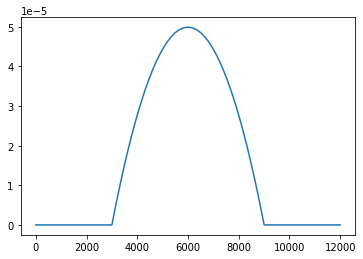

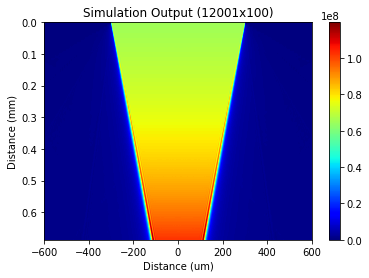

In [352]:
start_distance_1 = focal_distance * 0.
finish_distance_1 = focal_distance * 1.#-(l_radius/np.tan(theta))
# finish_distance_1 = focal_distance#-(l_radius/np.tan(theta))
lens.generate_profile(pixel_size=pixel_size)
# lens.profile = abs(lens.profile - np.max(lens.profile)) 

lens.profile = np.pad(lens.profile, pad_px)
plt.figure()
plt.plot(lens.profile)
frequency_array_1 = Simulation.generate_squared_frequency_array(
    n_pixels=len(lens.profile), pixel_size=pixel_size)

delta_1 = (lens.medium.refractive_index-medium.refractive_index) * lens.profile
phase_1 = (2 * np.pi * delta_1 / sim_wavelength) % (2 * np.pi)

wavefront_1 = A * np.exp(1j * phase_1) * passed_wavefront
wavefront_1 [0:pad_px] = 0 + 0j
wavefront_1 [-pad_px:] = 0 + 0j
wavefront_1 = fftpack.fft(wavefront_1)

n_slices_1 = 100

sim_1 = np.ones(shape=((n_slices_1), len(lens.profile)))
distances_1 = np.linspace(start_distance_1, finish_distance_1, n_slices_1)
for i, z in enumerate(distances_1):
    prop_1 = np.exp(1j * medium.wave_number * z) * np.exp(
        (-1j * 2 * np.pi ** 2 * z * frequency_array_1) / medium.wave_number
    )
    # print("prop shape: ", prop.shape)
    propagation = fftpack.ifft(prop_1 * wavefront_1)

    output = np.sqrt(propagation.real ** 2 + propagation.imag ** 2)

    sim_1[i] = np.clip(np.round(output, 10), 0, 10000)
    sim_1[i] = np.round(output, 10)

from lens_simulation import utils
utils.plot_simulation(sim_1, sim_1.shape[1], sim_1.shape[0], pixel_size, start_distance_1, finish_distance_1)
plt.show()
# passed_wavefront = propagation


True
False
(array([ 1,  1,  1, ..., 99, 99, 99], dtype=int64), array([   13,    34,    37, ..., 11995, 11996, 11998], dtype=int64))


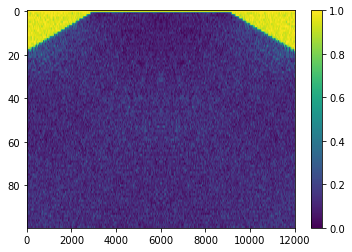

In [315]:
print(np.allclose(sim_2, sim_1, rtol=0.0000001))
print(np.array_equal(sim_2, sim_1))
plt.figure()
plt.imshow((np.equal(sim_2, sim_1)), aspect='auto')
plt.colorbar()

a = np.where(np.equal(sim_2, sim_1)== 0) 
print(a)
# print(a[0])